In [1]:
import importlib

In [376]:
import solver
import environments
importlib.reload(solver)
importlib.reload(environments)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
plt.style.use('ggplot');

In [98]:
def fix_seed():
    np.random.seed(42)
    random.seed(42)

In [60]:
def chopsticks_image(V, ax):
    img = np.zeros((144, 144))

    items = set()
    for key in V:
        a,b,c,d = key
        img[a*12+b, c*12+d] = V[key]
        img[a*12+b, d*12+c] = V[key]
        img[b*12+a, c*12+d] = V[key]
        img[b*12+a, d*12+c] = V[key]
        
    ax.imshow(img, cmap='RdYlGn', vmin=-1, vmax=1)
    ax.set_ylabel("Player 1")
    ax.set_xlabel("Player 2")

In [396]:
def racecar_v_to_img(V, view_actions=False):
    env = environments.Racecar()
    img = np.zeros((5, env.max_fuel * 2 + 1, env.max_speed + 1))
    for i,j,k in V:
        s = i,j,k
        actions = env.actions(s)
        best = np.argmax([
          sum(V[s_] * p for s_, p in env.transitions(s, a))
          for a in actions
        ])
        img[int(i*2), int(j*2), int(k)] = V[s]
        if view_actions:
            img[int(i*2), int(j*2), int(k)] = actions[best]

    img = (img - img.min()) / (img.max() - img.min())
    return img

def racecar_image(V, view_actions=False):
    env = environments.Racecar()
    img = racecar_v_to_img(V, view_actions)    
    fig, axs = plt.subplots(ncols=env.max_speed + 1, figsize=(10,5), sharex=True, sharey=True)

    for i, ax in enumerate(axs):
        ax.imshow(img[..., i], vmin=0, vmax=1, cmap='RdYlGn')
        ax.set_title(f"Speed = {i}")
        ax.set_xlabel("Fuel")

    axs[0].set_ylabel("Temperature")

    fig.tight_layout()

In [81]:
fix_seed()
env = environments.Chopsticks(12, 0.9)
V11, P11, C11, R11, T11 = solver.value_iteration(env)

Converged!


In [82]:
env = environments.Chopsticks(12, 0.9)
V12, P12, C12, R12, T12 = solver.policy_iteration(env)

Converged!


In [294]:
fix_seed()
env = environments.Chopsticks(12, 0.9)
V13, P13, C13, R13, T13, _ = solver.q_learning(env, iters=1000, eps=0.1, eps_decay=0.95, lr=0.1)

Converged!


In [298]:
env = environments.Racecar()
V21, P21, C21, R21, T21 = solver.value_iteration(env, rsims=1)

Converged!


In [297]:
env = environments.Racecar()
V22, P22, C22, R22, T22 = solver.policy_iteration(env, rsims=1)

Converged!


In [344]:
fix_seed()
env = environments.Racecar()
V23, P23, C23, R23, T23, Q = solver.q_learning(env, iters=1000, eps=0.4, lr=0.1, rsims=1, eps_decay=0.97, replay_size=1_000_000, min_reward=2800)

1129.0
1999.0
2008.0
2021.0
2323.0
2329.0
2774.0
2779.0
2795.0
2786.0
2782.0
2789.0
2791.0
2777.0
2778.0
2802.0
2791.0
2799.0
2791.0
2780.0
2808.0
2808.0
2777.0
2811.0
2800.0
2787.0
2802.0
2828.0
2824.0
Converged!


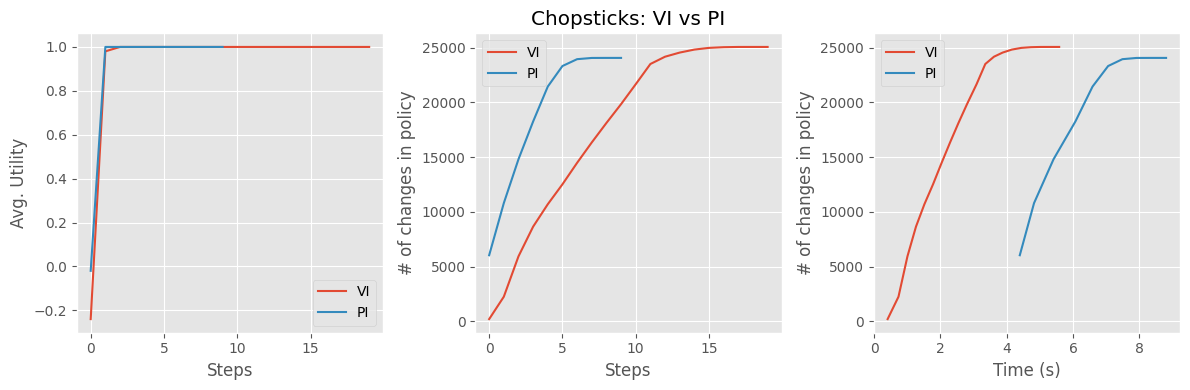

In [369]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

axs[1].set_title("Chopsticks: VI vs PI")

axs[0].plot(R11, label="VI")
axs[0].plot(R12, label="PI")
# axs[0].plot(R13, label="Q")
axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Avg. Utility")
axs[0].legend()

axs[1].plot(np.cumsum(C11), label="VI")
axs[1].plot(np.cumsum(C12), label="PI")
# axs[1].plot(np.cumsum(C13), label="Q")
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("# of changes in policy")
axs[1].legend()

axs[2].plot(T11, np.cumsum(C11), label="VI")
axs[2].plot(T12, np.cumsum(C12), label="PI")
# axs[2].plot(T13, np.cumsum(C13), label="Q")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("# of changes in policy")
axs[2].legend()

fig.tight_layout();

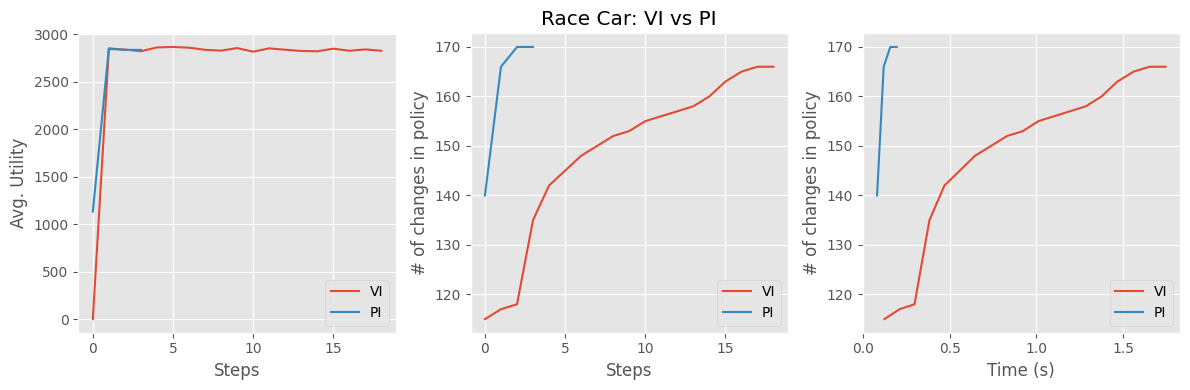

In [347]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

axs[1].set_title("Race Car: VI vs PI")

axs[0].plot(R21, label="VI")
axs[0].plot(R22, label="PI")
# axs[0].plot(R23, label="Q")
axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Avg. Utility")
axs[0].legend()

axs[1].plot(np.cumsum(C21), label="VI")
axs[1].plot(np.cumsum(C22), label="PI")
# axs[1].plot(np.cumsum(C23), label="Q")
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("# of changes in policy")
axs[1].legend()

axs[2].plot(T21, np.cumsum(C21), label="VI")
axs[2].plot(T22, np.cumsum(C22), label="PI")
# axs[2].plot(T23, np.cumsum(C23), label="Q")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("# of changes in policy")
axs[2].legend()

fig.tight_layout();

Converged!
Converged!
Converged!
Converged!
Converged!
Converged!
Converged!


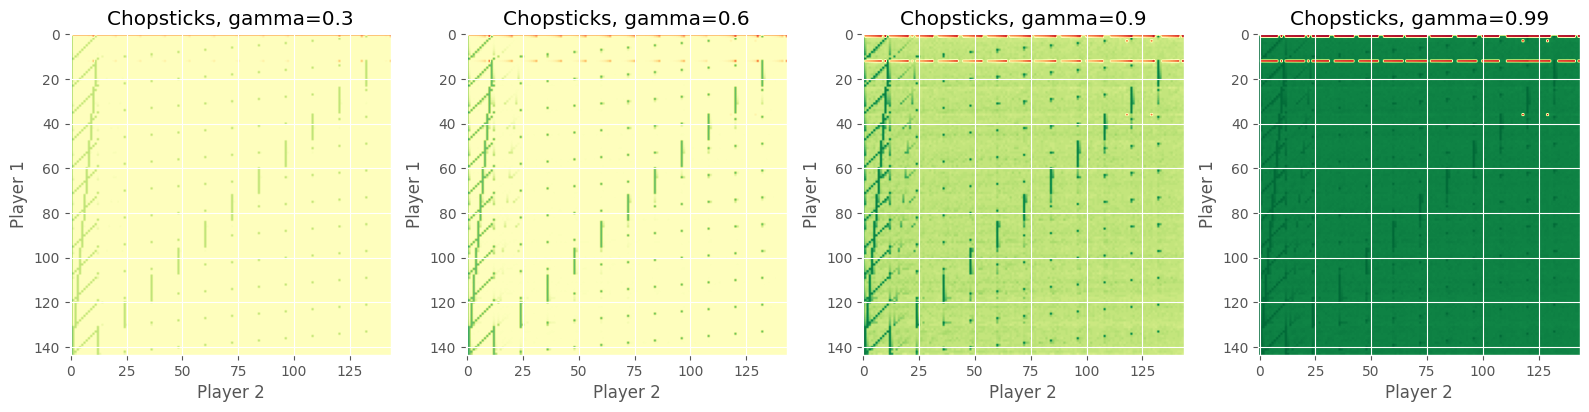

In [90]:
fig, axs = plt.subplots(ncols=4, figsize=(16, 4))
chopsticks_gamma_r_vi = []
chopsticks_gamma_r_pi = []

for i, gamma in enumerate([0.3, 0.6, 0.9, 0.99]):
    fix_seed()
    env = environments.Chopsticks(12, gamma)
    
    V, P, C, R, T = solver.value_iteration(env)
    chopsticks_image(V, axs[i])
    axs[i].set_title(f"Chopsticks, gamma={gamma}")
    chopsticks_gamma_r_vi.append(len(C))
    
    V, P, C, R, T = solver.policy_iteration(env)
    chopsticks_gamma_r_pi.append(len(C))
    
fig.tight_layout()

Converged!
Converged!
Converged!
Converged!
Converged!
Converged!
Converged!
Converged!


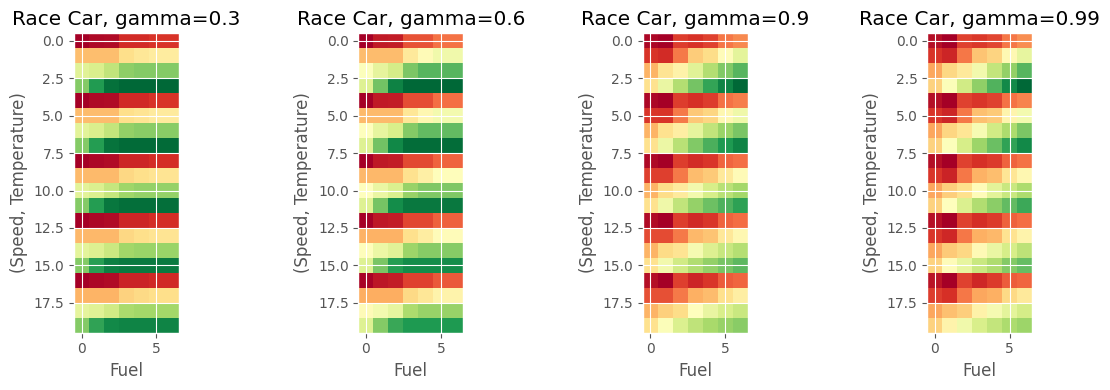

In [408]:
fig, axs = plt.subplots(ncols=4, figsize=(12, 4))

racecar_gamma_r_vi = []
racecar_gamma_r_pi = []

for i, gamma in enumerate([0.3, 0.6, 0.9, 0.99]):
    fix_seed()
    env = environments.Racecar(gamma)
    
    V, P, C, R, T = solver.value_iteration(env, rsims=1)
    racecar_gamma_r_vi.append(len(C))

    img = racecar_v_to_img(V)
    img = np.swapaxes(img, 0, 1).reshape((7, -1))
    axs[i].set_title(f"Race Car, gamma={gamma}")
    axs[i].imshow(img.T, cmap='RdYlGn')
    axs[i].set_xlabel('Fuel')
    axs[i].set_ylabel("(Speed, Temperature)")
    
    V, P, C, R, T = solver.policy_iteration(env, rsims=1)
    racecar_gamma_r_pi.append(len(C))
    
fig.tight_layout()

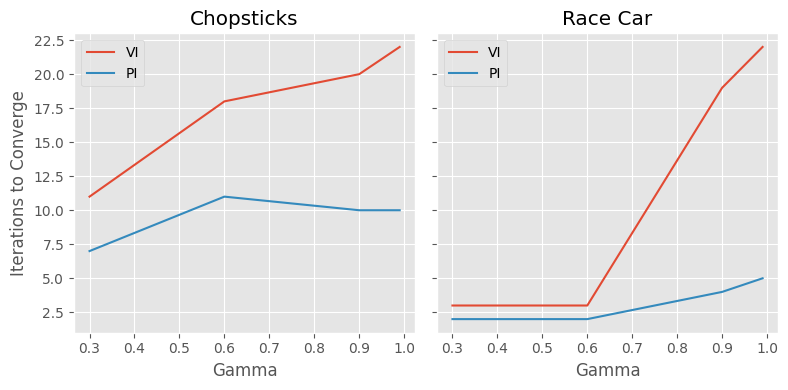

In [188]:
fig, axs = plt.subplots(ncols=2, figsize=(8,4), sharey=True)
x = [0.3, 0.6, 0.9, 0.99]

axs[0].plot(x, chopsticks_gamma_r_vi, label='VI')
axs[0].plot(x, chopsticks_gamma_r_pi, label='PI')
axs[0].set_xlabel("Gamma")
axs[0].set_ylabel("Iterations to Converge")
axs[0].set_title("Chopsticks")
axs[0].legend()

axs[1].plot(x, racecar_gamma_r_vi, label='VI')
axs[1].plot(x, racecar_gamma_r_pi, label='PI')
axs[1].set_xlabel("Gamma")
axs[1].set_title("Race Car")
axs[1].legend()

fig.tight_layout();

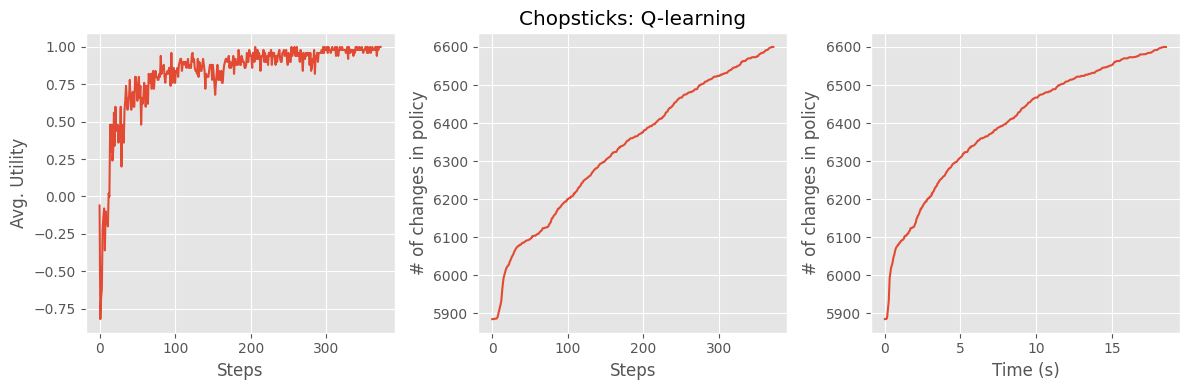

In [373]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

axs[1].set_title("Chopsticks: Q-learning")

# axs[0].plot(R11, label="VI")
# axs[0].plot(R12, label="PI")
axs[0].plot(R13, label="Q")
axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Avg. Utility")
# axs[0].legend()

# axs[1].plot(np.cumsum(C11), label="VI")
# axs[1].plot(np.cumsum(C12), label="PI")
axs[1].plot(np.cumsum(C13), label="Q")
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("# of changes in policy")
# axs[1].legend()

# axs[2].plot(T11, np.cumsum(C11), label="VI")
# axs[2].plot(T12, np.cumsum(C12), label="PI")
axs[2].plot(T13, np.cumsum(C13), label="Q")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("# of changes in policy")
# axs[2].legend()

fig.tight_layout();

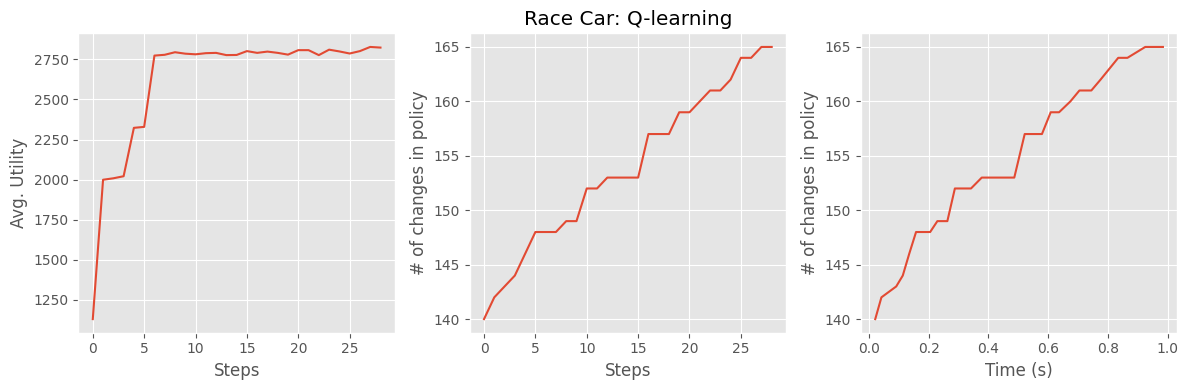

In [375]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))

axs[1].set_title("Race Car: Q-learning")

# axs[0].plot(R21, label="VI")
# axs[0].plot(R22, label="PI")
axs[0].plot(R23, label="Q")
axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Avg. Utility")
# axs[0].legend()

# axs[1].plot(np.cumsum(C21), label="VI")
# axs[1].plot(np.cumsum(C22), label="PI")
axs[1].plot(np.cumsum(C23), label="Q")
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("# of changes in policy")
# axs[1].legend()

# axs[2].plot(T21, np.cumsum(C21), label="VI")
# axs[2].plot(T22, np.cumsum(C22), label="PI")
axs[2].plot(T23, np.cumsum(C23), label="Q")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("# of changes in policy")
# axs[2].legend()

fig.tight_layout();

0.5571428571428572

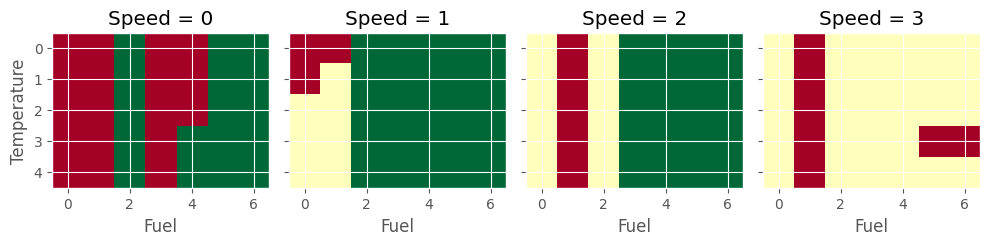

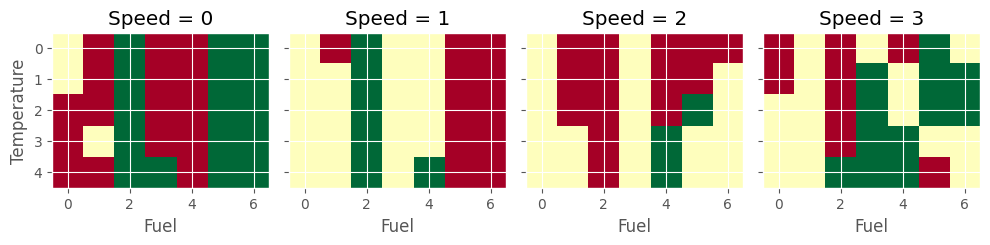

In [433]:
racecar_image(V21, True)
racecar_image(V23, True)
solver.compare_policies(P21, P23) / len(P23)

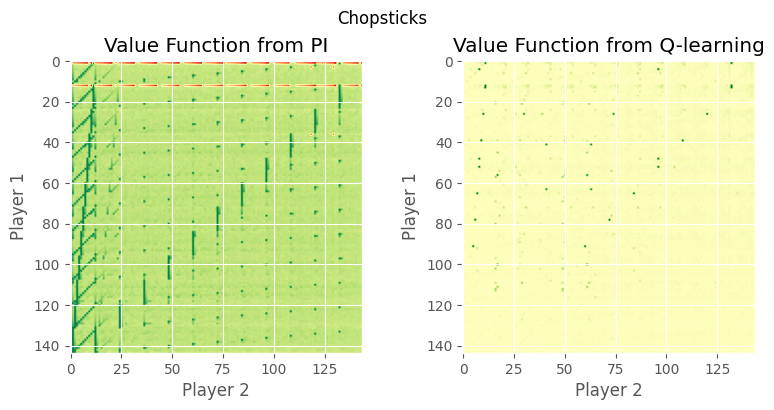

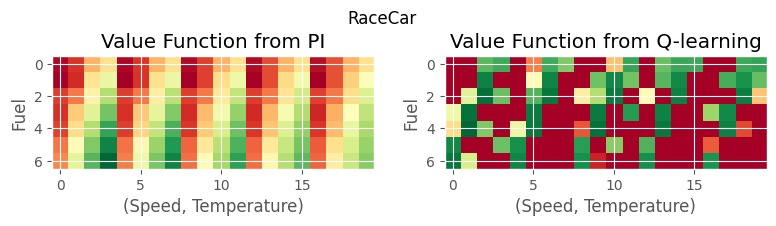

In [431]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))

chopsticks_image(V11, axs[0])
axs[0].set_title("Value Function from PI")
chopsticks_image(V13, axs[1])
axs[1].set_title("Value Function from Q-learning")
fig.suptitle('Chopsticks')
fig.tight_layout()

fig, axs = plt.subplots(ncols=2, figsize=(8, 2))

img = racecar_v_to_img(V21)
img = np.swapaxes(img, 0, 1).reshape((7, -1))
axs[0].imshow(img, cmap='RdYlGn')
axs[0].set_title("Value Function from PI")
axs[0].set_ylabel('Fuel')
axs[0].set_xlabel("(Speed, Temperature)")
img = racecar_v_to_img(V23)
img = np.swapaxes(img, 0, 1).reshape((7, -1))
axs[1].imshow(img, cmap='RdYlGn')
axs[1].set_title("Value Function from Q-learning")
axs[1].set_ylabel('Fuel')
axs[1].set_xlabel("(Speed, Temperature)")
fig.suptitle('RaceCar')
fig.tight_layout()

In [409]:
racecar_q_eps = {}

for i, eps in enumerate([0.1, 0.2, 0.3]):
    for j, eps_decay in enumerate([0.9, 0.95, 0.99]):
        fix_seed()
        env = environments.Racecar(0.9)
        V, P, C, R, T, _ = solver.q_learning(env, iters=300, eps=eps, lr=0.1, rsims=1, eps_decay=eps_decay, replay_size=1_000_000, min_reward=2800)
        racecar_q_eps[(eps, eps_decay)] = R
        

fix_seed()
env = environments.Racecar(0.9)
V, P, C, R, T, _ = solver.q_learning(env, iters=300, eps=0, min_eps=0, lr=0.1, rsims=1, eps_decay=1, replay_size=1_000_000, min_reward=2800, init=30)
racecar_q_eps[(0, 0)] = R

1129.0
1999.0
2008.0
2021.0
1995.0
2011.0
2351.0
2343.0
2708.0
2691.0
2676.0
2703.0
2709.0
2668.0
2690.0
2802.0
2785.0
2799.0
2791.0
2780.0
2808.0
2808.0
2777.0
2811.0
2800.0
2787.0
2770.0
2809.0
2774.0
2787.0
2791.0
2806.0
2798.0
2811.0
2824.0
2791.0
2818.0
2802.0
2807.0
Converged!
1129.0
1999.0
2008.0
2021.0
1995.0
2011.0
2351.0
2343.0
2708.0
2691.0
2676.0
2703.0
2709.0
2668.0
2690.0
2746.0
2744.0
2766.0
2791.0
2780.0
2808.0
2808.0
2777.0
2811.0
2800.0
2787.0
2770.0
2809.0
2774.0
2787.0
2791.0
2806.0
2798.0
2811.0
2824.0
2791.0
2818.0
2802.0
2807.0
Converged!
1129.0
1999.0
2008.0
2021.0
1995.0
2011.0
1988.0
2707.0
2708.0
2691.0
2676.0
2703.0
2751.0
2754.0
2751.0
2746.0
2744.0
2766.0
2775.0
2752.0
2753.0
2808.0
2777.0
2811.0
2800.0
2787.0
2770.0
2809.0
2774.0
2787.0
2791.0
2806.0
2798.0
2811.0
2824.0
2791.0
2852.0
2842.0
2841.0
Converged!
1129.0
1999.0
2008.0
2021.0
1995.0
2011.0
2351.0
2707.0
2708.0
2691.0
2782.0
2789.0
2791.0
2777.0
2778.0
2802.0
2785.0
2799.0
2791.0
2780.0
2808.0
2

In [410]:
chopsticks_q_eps = {}

for i, eps in enumerate([0.1, 0.2, 0.3]):
    for j, eps_decay in enumerate([0.9, 0.95, 0.99]):
        print(i,j)
        fix_seed()
        env = environments.Chopsticks(12, 0.9)
        V, P, C, R, T, _ = solver.q_learning(env, iters=300, eps=eps, lr=0.1, rsims=50, eps_decay=eps_decay, replay_size=1_000_000, min_reward=0.95)
        chopsticks_q_eps[(eps, eps_decay)] = R
        

fix_seed()
env = environments.Chopsticks(12, 0.9)
V, P, C, R, T, _ = solver.q_learning(env, iters=300, eps=0, min_eps=0, lr=0.1, rsims=50, eps_decay=1, replay_size=1_000_000, min_reward=0.95, init=10)
chopsticks_q_eps[(0, 0)] = R

0 0
0.04
-0.8
-0.88
-0.8
0.0
0.12
-0.24
-0.08
-0.12
-0.04
0.12
-0.04
0.04
0.16
0.04
-0.12
-0.04
0.48
0.08
0.44
0.44
0.44
0.64
0.64
0.64
0.64
0.52
0.68
0.72
0.6
0.64
0.68
0.8
0.76
0.76
0.8
0.76
0.8
0.84
0.92
0.88
0.92
0.8
0.96
1.0
1.0
Converged!
0 1
0.04
-0.8
-0.84
-0.68
-0.28
0.16
-0.12
-0.28
0.0
0.12
0.28
0.24
0.2
0.2
0.28
0.36
0.64
0.76
0.56
0.84
0.56
0.8
0.6
0.84
0.6
0.72
0.8
0.68
0.72
0.8
0.88
0.96
0.8
0.72
0.68
0.92
0.92
0.8
0.8
0.84
0.76
0.88
0.88
0.72
0.76
0.72
0.56
0.72
0.76
0.76
0.76
0.88
1.0
0.8
0.72
0.8
0.76
0.88
0.8
0.64
0.72
0.72
0.72
0.88
0.92
0.88
0.76
0.92
0.72
0.84
0.92
0.84
0.8
0.92
0.8
0.84
0.76
0.88
0.88
0.84
0.8
0.88
0.88
0.96
0.92
0.8
0.76
0.76
0.8
0.96
0.88
0.92
0.84
0.96
0.96
0.88
1.0
0.8
0.92
0.92
0.92
0.96
0.96
0.96
Converged!
0 2
0.04
-0.8
-0.88
0.0
-0.08
0.04
0.12
0.08
0.32
0.52
0.44
0.4
0.2
0.16
0.16
0.32
0.44
0.2
0.32
0.48
0.24
0.28
0.4
0.4
0.48
0.64
0.56
0.48
0.68
0.64
0.6
0.64
0.84
0.84
0.88
0.76
0.68
0.68
0.8
0.8
0.92
0.64
0.92
0.84
0.88
0.68
0.8
0.68
0

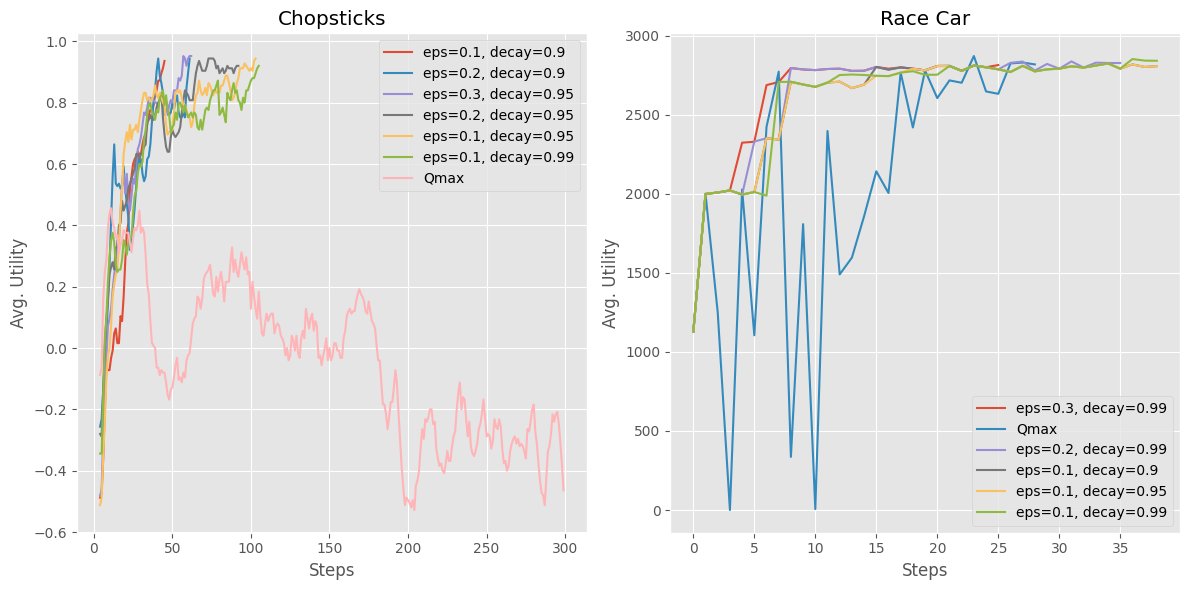

In [420]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
    
for k, rewards in sorted(chopsticks_q_eps.items(), key=lambda x: len(x[1]))[:6]:
    if k == (0,0):
        continue
    else:
        eps, eps_decay = k
        label = f"eps={eps}, decay={eps_decay}"
    axs[0].plot(pd.Series(rewards).rolling(5).mean(), label=label)
axs[0].plot(pd.Series(chopsticks_q_eps[(0,0)]).rolling(5).mean(), label="Qmax")

axs[0].legend();
axs[0].set_title("Chopsticks")
axs[0].set_xlabel('Steps')
axs[0].set_ylabel("Avg. Utility")


for k, rewards in sorted(racecar_q_eps.items(), key=lambda x: len(x[1]))[:6]:
    if k == (0,0):
        label = "Qmax"
    else:
        eps, eps_decay = k
        label = f"eps={eps}, decay={eps_decay}"
    axs[1].plot(rewards, label=label)
axs[1].legend()
axs[1].set_title("Race Car")
axs[1].set_xlabel('Steps')
axs[1].set_ylabel("Avg. Utility");

fig.tight_layout()